In [1]:
import scanpy as sc
import os

In [2]:
os.chdir("D:\\spatial_project\\spatial_ovary_new-main\\Ovary_v4")

In [3]:
from Read_files import read_free_h5ad

In [4]:
##### total_counts/spot #####

In [5]:
import os

pasta = "D:\\spatial_project\\spatial_ovary_new-main\\Ovary_v4\\data\\GEO_total"

def listar_caminhos_arquivos(pasta):
    caminhos_arquivos = []

    # Lista os nomes de arquivos na pasta
    nomes_arquivos = os.listdir(pasta)

    # Cria os caminhos completos para cada arquivo
    for nome_arquivo in nomes_arquivos:
        caminho_completo = os.path.join(pasta, nome_arquivo)
        caminhos_arquivos.append(caminho_completo)

    return caminhos_arquivos

# Especifica o caminho para a pasta
caminho_pasta = "D:\\spatial_project\\spatial_ovary_new-main\\Ovary_v4\\data\\GEO_total"

# Obtém os caminhos de todos os arquivos na pasta
caminhos_arquivos = listar_caminhos_arquivos(caminho_pasta)

# Imprime os caminhos dos arquivos
for caminho_arquivo in caminhos_arquivos:
    print(caminho_arquivo)


D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO1
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO10
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO11
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO12
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO2
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO3
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO4
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO5
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO6
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO7
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO8
D:\spatial_project\spatial_ovary_new-main\Ovary_v4\data\GEO_total\GEO9


In [29]:
def listar_caminhos_diretorios(pasta):
    caminhos_diretorios = [os.path.join(pasta, nome) for nome in os.listdir(pasta) if os.path.isdir(os.path.join(pasta, nome))]
    return caminhos_diretorios

# Especifica o caminho para a pasta principal contendo subpastas
caminho_pasta_principal = "/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/GEO_total"

# Obtém os caminhos de todas as subpastas na pasta principal
caminhos_subpastas = listar_caminhos_diretorios(caminho_pasta_principal)

# Cria dicionários para armazenar os resultados
resultados_por_subpasta = {}

# Itera sobre as subpastas e aplica a função read_free_h5ad
for caminho_subpasta in caminhos_subpastas:
    nome_subpasta = os.path.basename(caminho_subpasta)
    resultados_por_subpasta[nome_subpasta] = read_free_h5ad(caminho_subpasta)

# Agora, os resultados estão armazenados no dicionário resultados_por_subpasta
# Cada subpasta tem uma chave associada aos resultados correspondentes

In [31]:
READs_per_spot = []
for i in resultados_por_subpasta:
    adata = resultados_por_subpasta[i]
    adata.var["mt"] = adata.var["gene_ids"].str.startswith("MT-")
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
    READs_per_spot.append(adata.obs["total_counts"].mean()/adata.n_obs)

In [32]:
READs_per_spot

[5.1181372811581785,
 34.88074328015734,
 26.193084716796875,
 34.362895226603406,
 104.02646315028902,
 28.98877227440309,
 24.274678616220736,
 89.19011101973685,
 24.313943030498283,
 1.484038876815581,
 23.96565625,
 37.734410592255124]

In [118]:
#adata = read_free_h5ad(DIR= "/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/10x3_WT") # decon funcionou, logo a função read_free_h5ad é funcional!!!

In [4]:
def QuickCheck(adata):
    print(f"#cells after min filter: {adata.n_obs}")
    print(f"#genes after min filter: {adata.n_vars}")

In [1]:
import scanpy as sc

In [33]:
adata = sc.read_h5ad("/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/10x_files/PP_10x1_WT.h5ad")
adata.var_names_make_unique()

In [35]:
adata.obs["total_counts"].mean()/adata.n_obs

2.747365748049777

In [6]:
adata.obs

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_counts,leiden
AAACAAGTATCTCCCA-1,1,50,102,2460,7.808323,4752.0,8.466531,23.106061,31.439394,40.551347,55.239899,393.0,5.976351,8.270202,4752.0,1
AAACACCAATAACTGC-1,1,59,19,3842,8.254009,10543.0,9.263312,29.887129,38.594328,46.618610,57.839325,1436.0,7.270313,13.620413,10543.0,4
AAACAGGGTCTATATT-1,1,47,13,3840,8.253488,10174.0,9.227689,26.567722,34.824061,42.815019,55.258502,1300.0,7.170888,12.777668,10174.0,4
AAACATTTCCCGGATT-1,1,61,97,2638,7.878155,5198.0,8.556222,22.912659,30.377068,39.399769,53.982301,477.0,6.169611,9.176607,5198.0,3
AAACCCGAACGAAATC-1,1,45,115,3770,8.235095,8803.0,9.082961,18.118823,26.684085,35.681018,49.733046,190.0,5.252274,2.158355,8803.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCAGTGTGCTAC-1,1,24,64,5374,8.589514,15281.0,9.634431,17.374517,25.914534,34.742491,47.411819,486.0,6.188264,3.180420,15281.0,0
TTGTTGTGTGTCAAGA-1,1,31,77,4085,8.315322,10426.0,9.252154,22.817955,32.284673,40.974487,53.318627,752.0,6.624065,7.212737,10426.0,4
TTGTTTCACATCCAGG-1,1,58,42,3210,8.074338,7732.0,8.953252,23.629074,33.484221,42.964304,56.492499,593.0,6.386879,7.669426,7732.0,2
TTGTTTCATTAGTCTA-1,1,60,30,2831,7.948738,6291.0,8.747034,26.100779,33.635352,42.298522,56.302655,826.0,6.717805,13.129868,6291.0,4


In [7]:
import pandas as pd

In [8]:
adata.obs.head(5)

,array_row,array_col
GACTAAGTAGGCTCAC-1,3561,3618
ACTGTACGATACACAT-1,3957,5524
ATAGTGAAGCGTTCTC-1,4942,4311
GCCGGGTTAGGGTCGC-1,4949,4421
CTCCGCCCACATGAGG-1,5077,3312


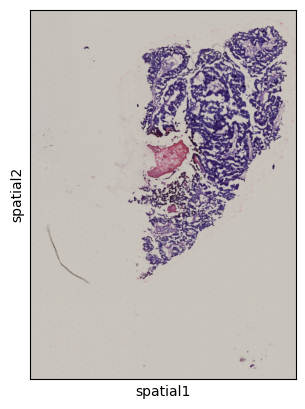

In [9]:
sc.pl.spatial(adata) #remove header: barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres

In [10]:
adata.var.head(2)

,gene_ids,feature_types
ENSG00000243485,MIR1302-2HG,Gene Expression
ENSG00000237613,FAM138A,Gene Expression


In [11]:
adata.var["mt"] = adata.var["gene_ids"].str.startswith("MT-")

In [12]:
for i in adata.var["gene_ids"]:
    if i.startswith("MT-"):
        print(i)
    else:
        pass

MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4
MT-ND5
MT-ND6
MT-CYB


In [13]:
adata.var["gene_ids"].str.startswith("MT-")[adata.var["gene_ids"].str.startswith("MT-")==True]

ENSG00000198888    True
ENSG00000198763    True
ENSG00000198804    True
ENSG00000198712    True
ENSG00000228253    True
ENSG00000198899    True
ENSG00000198938    True
ENSG00000198840    True
ENSG00000212907    True
ENSG00000198886    True
ENSG00000198786    True
ENSG00000198695    True
ENSG00000198727    True
Name: gene_ids, dtype: bool

In [14]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [15]:
adata.obs.head(5)

,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
GACTAAGTAGGCTCAC-1,3561,3618,6554,8.787983,18211.0,9.809836,10.861567,16.835978,24.303992,36.807424,160.0,5.081404,0.878590
ACTGTACGATACACAT-1,3957,5524,9395,9.148039,51290.0,10.845270,18.966660,26.028466,34.712420,46.474946,867.0,6.766191,1.690388
ATAGTGAAGCGTTCTC-1,4942,4311,7542,8.928375,27248.0,10.212772,13.894598,20.651057,28.684674,40.799325,184.0,5.220356,0.675279
GCCGGGTTAGGGTCGC-1,4949,4421,4960,8.509363,10145.0,9.224834,9.226220,14.154756,21.163135,34.844751,183.0,5.214936,1.803844
CTCCGCCCACATGAGG-1,5077,3312,8392,9.035153,31258.0,10.350062,12.022522,18.171348,25.823789,37.951884,544.0,6.300786,1.740355


In [16]:
adata.obs["n_genes_by_counts"].mean()

5839.617312072893

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
# fig, axs = plt.subplots(1, 4, figsize=(15, 4))
# sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
# sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
# sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
# sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

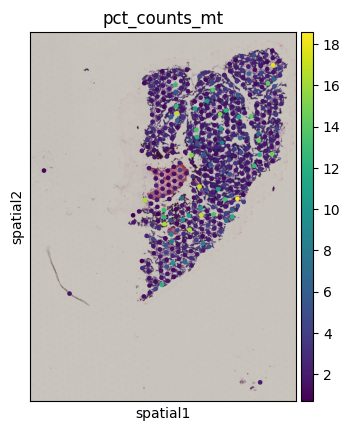

In [18]:
sc.pl.spatial(adata, color="pct_counts_mt")

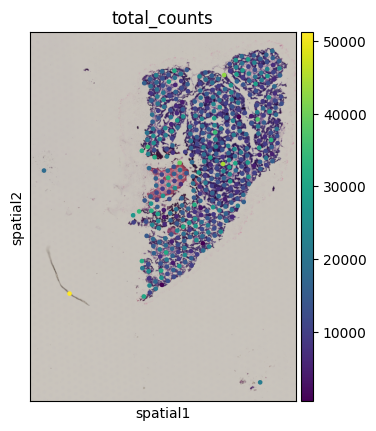

In [19]:
sc.pl.spatial(adata, color=["total_counts"])

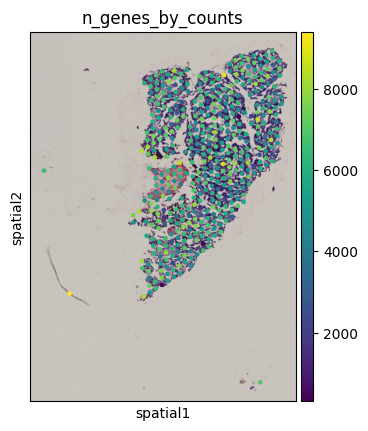

In [20]:
sc.pl.spatial(adata, color=["n_genes_by_counts"])

In [21]:
adata.obs["total_counts"].min()

385.0

In [22]:
adata

AnnData object with n_obs × n_vars = 439 × 36601
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

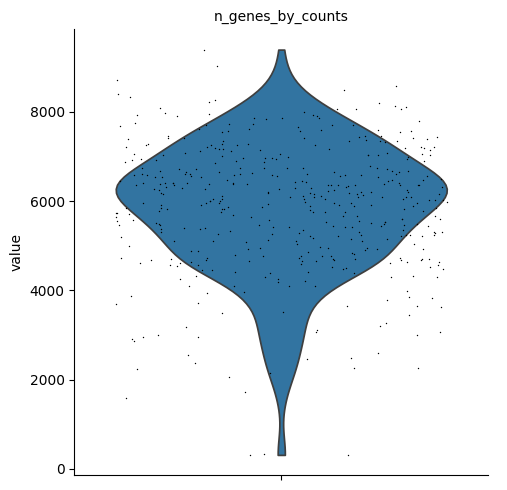

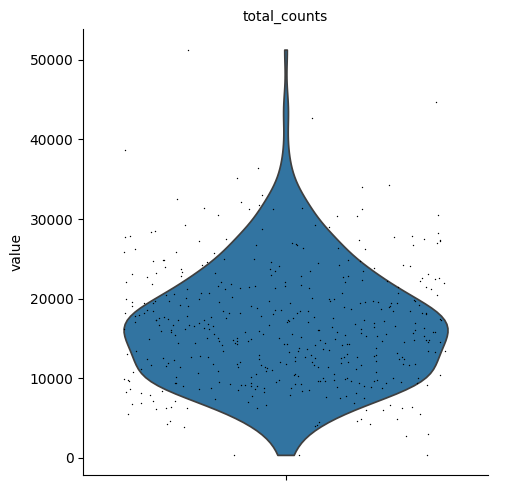

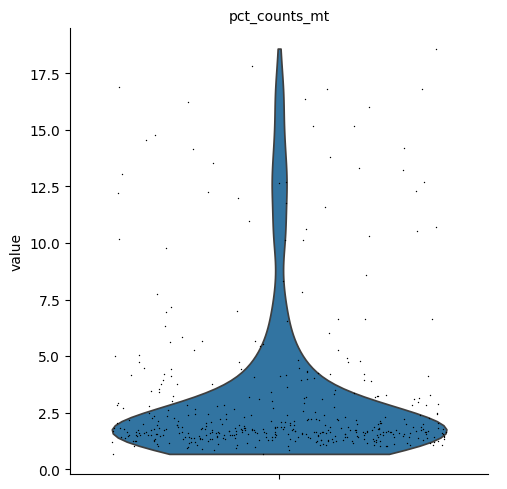

In [23]:
lista = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt']
for i in lista:
    sc.pl.violin(adata, i,
             jitter=0.4, multi_panel=True)

In [542]:
sc.pp.filter_cells(adata, min_counts=7000)
QuickCheck(adata)

#cells after min filter: 408
#genes after min filter: 36601


d:\spatial_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\spatial_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\spatial_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\spatial_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

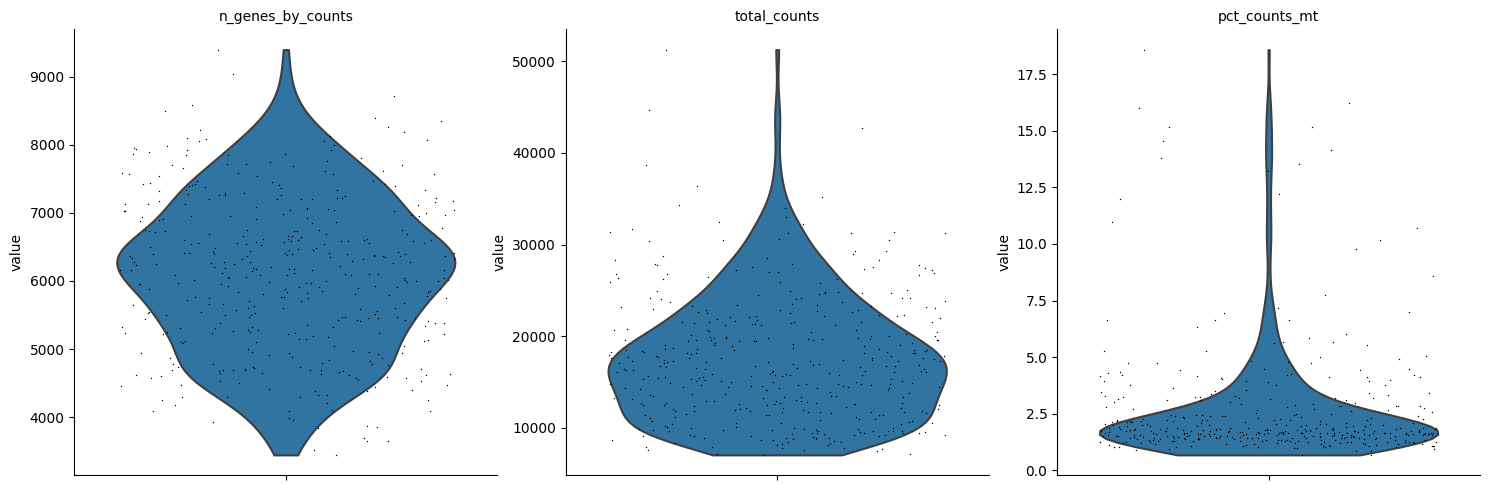

In [543]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [544]:
sc.pp.filter_cells(adata, max_counts=30000)
QuickCheck(adata)

#cells after min filter: 387
#genes after min filter: 36601


d:\spatial_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\spatial_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\spatial_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\spatial_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

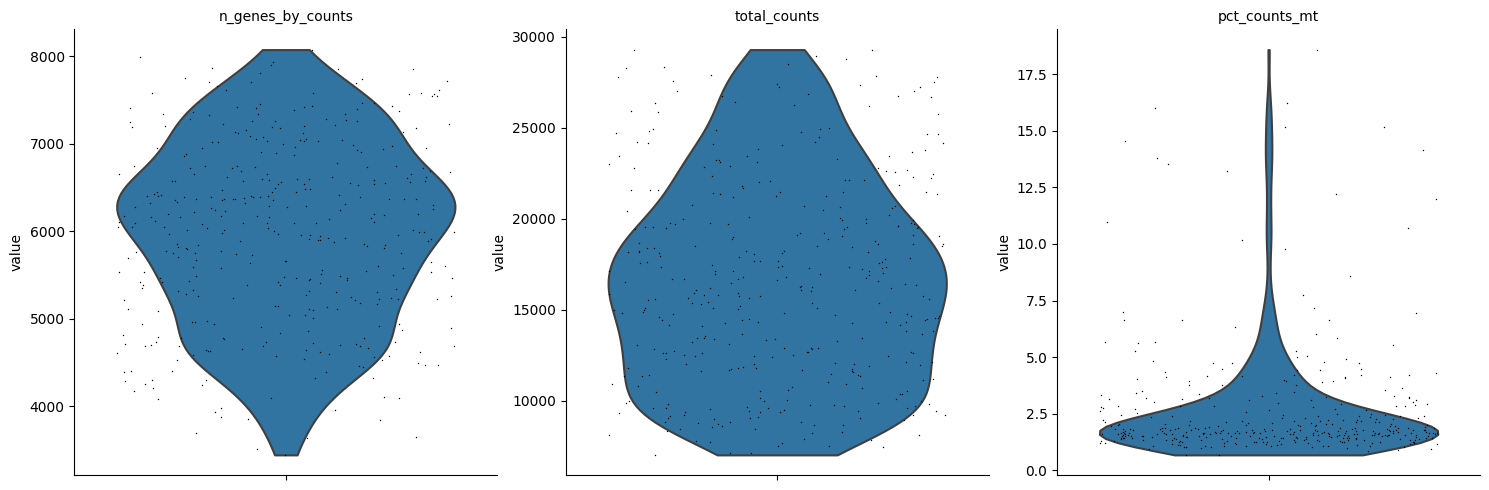

In [545]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [513]:
adata = adata[adata.obs["pct_counts_mt"] < 5]
QuickCheck(adata)

#cells after min filter: 353
#genes after min filter: 8668


In [546]:
sc.pp.filter_genes(adata, min_cells=300)
QuickCheck(adata)

#cells after min filter: 387
#genes after min filter: 2210


/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1

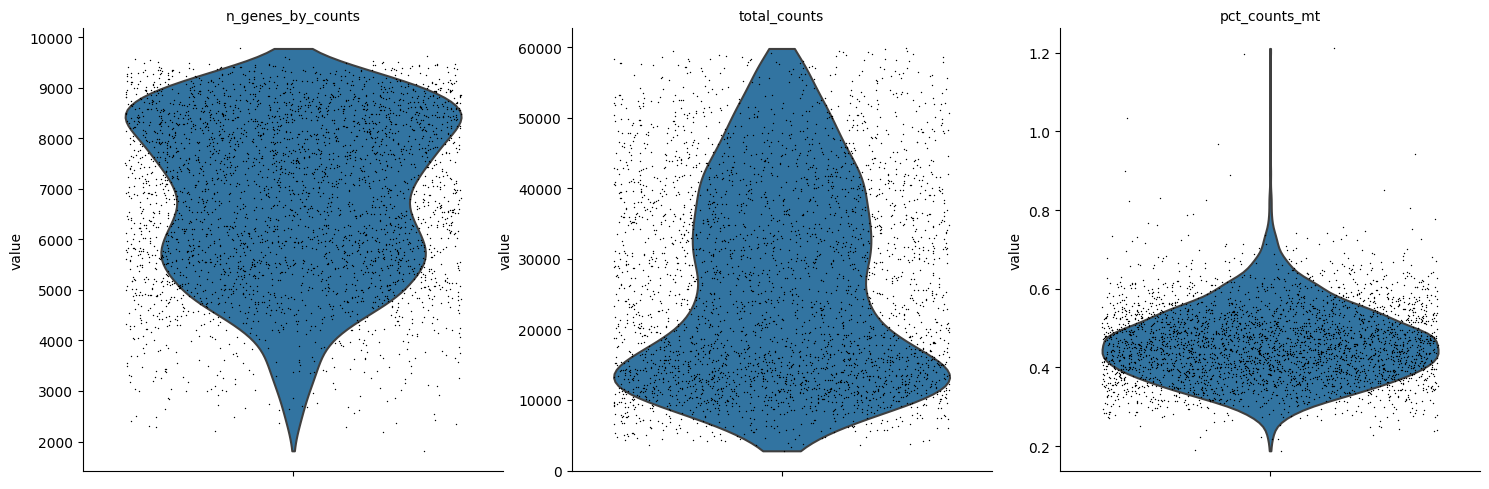

In [19]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [20]:
adata.layers["counts"] = adata.X.copy()

In [21]:
sc.pp.normalize_total(adata, target_sum=10e4)

In [22]:
sc.pp.log1p(adata)

In [230]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
QuickCheck(adata)

d:\spatial_project\.venv\Lib\site-packages\scipy\sparse\_data.py:148: RuntimeWarning: overflow encountered in expm1
  result = op(self._deduped_data())
d:\spatial_project\.venv\Lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:204: RuntimeWarning: overflow encountered in expm1
  X = np.expm1(X)


ValueError: cannot specify integer `bins` when input data contains infinity

In [24]:
sc.pp.pca(adata)

In [25]:
sc.pp.neighbors(adata)

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
sc.tl.umap(adata)

In [15]:
adata = pp(adata)

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1

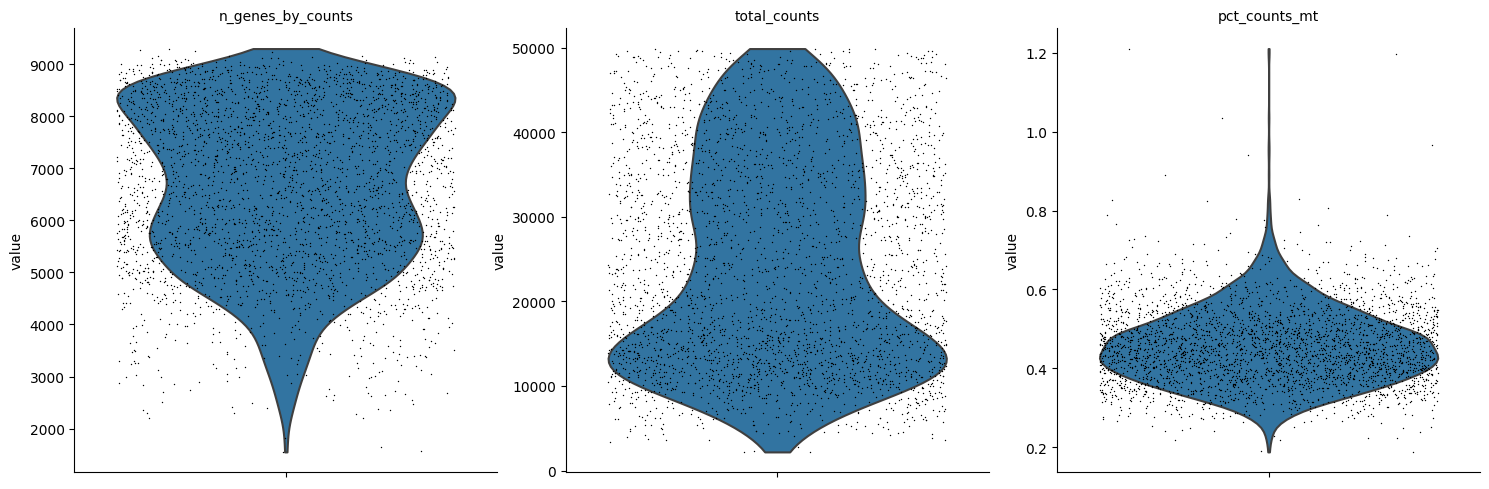

In [25]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [18]:
sc.tl.leiden(adata)

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


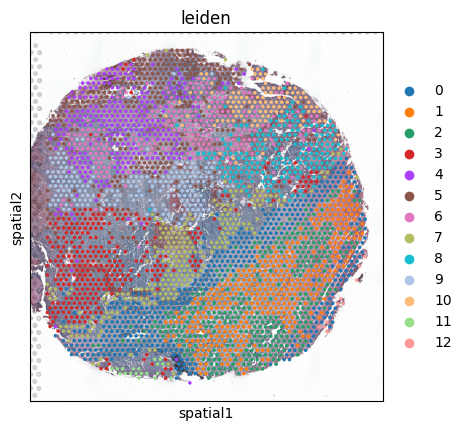

In [19]:
sc.pl.spatial(adata, color="leiden")

In [21]:
adata

AnnData object with n_obs × n_vars = 3115 × 15311
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/pedrovideira/Desktop/spatial_ovary_new-main/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


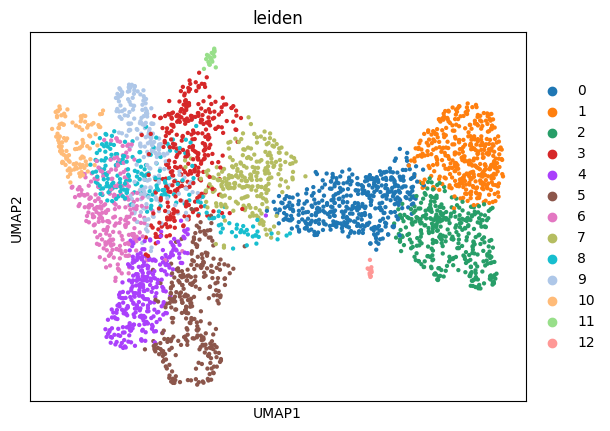

In [20]:
sc.pl.umap(adata, color = "leiden")

In [17]:
adata

AnnData object with n_obs × n_vars = 3112 × 15311
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

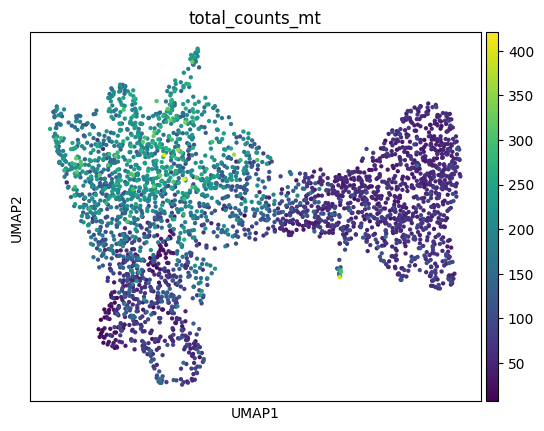

In [22]:
sc.pl.umap(adata, color="total_counts_mt")

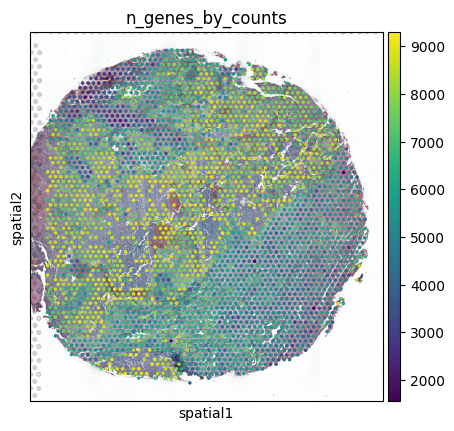

In [27]:
sc.pl.spatial(adata, color="n_genes_by_counts")

/tmp/ipykernel_670771/1125004840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
/tmp/ipykernel_670771/1125004840.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins

<Axes: xlabel='n_genes_by_counts'>

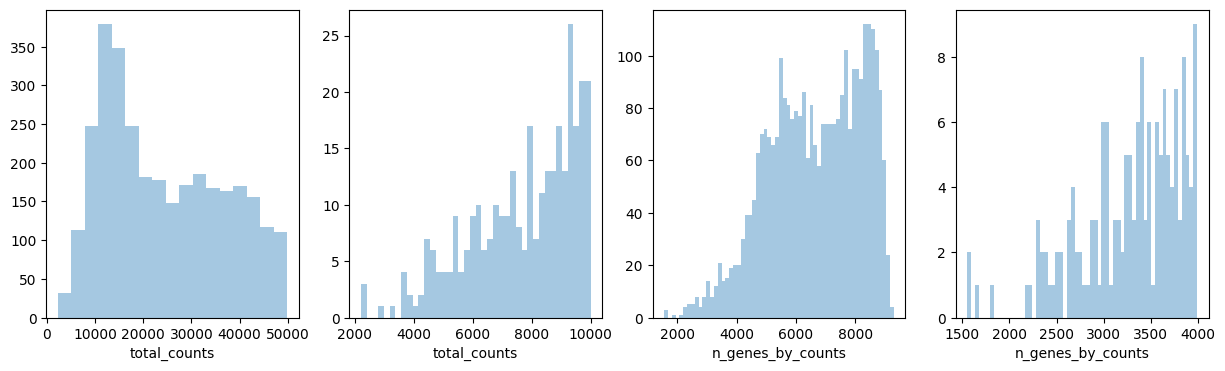

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [36]:
adata.obs.head(5)

,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_counts,leiden
GCATAGAGCACTCAGG-1,4713,4462,1084,6.989335,1705.0,7.441907,21.876833,31.085044,43.343109,65.747801,34.0,3.555348,1.994135,1705.0,3
GCAGATTAGGGATATC-1,4718,4572,1413,7.254178,2323.0,7.751045,18.682738,28.368489,41.067585,60.697374,50.0,3.931826,2.152389,2323.0,4
CCAGCCTGGACCAATA-1,4728,4791,1320,7.186144,2333.0,7.755339,24.260609,33.733390,45.006429,64.852122,39.0,3.688879,1.671667,2333.0,1
TGGCAGCAGTAATAGT-1,4909,4562,914,6.818924,1456.0,7.284135,23.695055,34.615385,48.969780,71.565934,27.0,3.332205,1.854396,1456.0,2
TCACGTGCCCGATTCA-1,4816,4622,909,6.813445,1533.0,7.335634,26.614481,36.921070,50.945858,73.320287,34.0,3.555348,2.217873,1533.0,3


In [37]:
adata

AnnData object with n_obs × n_vars = 131 × 4483
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [42]:
adata.obsp["distances"]

<131x131 sparse matrix of type '<class 'numpy.float64'>'
	with 1834 stored elements in Compressed Sparse Row format>

In [ ]:
"""""
AnnData object with n_obs × n_vars = 131 × 4483
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'
"""

In [ ]:
""""
AnnData object with n_obs × n_vars = 4274 × 18262
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'gene_ids-1', 'feature_types-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'gene_ids-10', 'feature_types-10', 'mt-10', 'n_cells_by_counts-10', 'mean_counts-10', 'log1p_mean_counts-10', 'pct_dropout_by_counts-10', 'total_counts-10', 'log1p_total_counts-10', 'n_cells-10', 'highly_variable-10', 'means-10', 'dispersions-10', 'dispersions_norm-10', 'gene_ids-11', 'feature_types-11', 'mt-11', 'n_cells_by_counts-11', 'mean_counts-11', 'log1p_mean_counts-11', 'pct_dropout_by_counts-11', 'total_counts-11', 'log1p_total_counts-11', 'n_cells-11', 'highly_variable-11', 'means-11', 'dispersions-11', 'dispersions_norm-11', 'gene_ids-2', 'feature_types-2', 'mt-2', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'gene_ids-3', 'feature_types-3', 'mt-3', 'n_cells_by_counts-3', 'mean_counts-3', 'log1p_mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'log1p_total_counts-3', 'n_cells-3', 'highly_variable-3', 'means-3', 'dispersions-3', 'dispersions_norm-3', 'gene_ids-4', 'feature_types-4', 'mt-4', 'n_cells_by_counts-4', 'mean_counts-4', 'log1p_mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4', 'log1p_total_counts-4', 'n_cells-4', 'highly_variable-4', 'means-4', 'dispersions-4', 'dispersions_norm-4', 'gene_ids-5', 'feature_types-5', 'mt-5', 'n_cells_by_counts-5', 'mean_counts-5', 'log1p_mean_counts-5', 'pct_dropout_by_counts-5', 'total_counts-5', 'log1p_total_counts-5', 'n_cells-5', 'highly_variable-5', 'means-5', 'dispersions-5', 'dispersions_norm-5', 'gene_ids-6', 'feature_types-6', 'mt-6', 'n_cells_by_counts-6', 'mean_counts-6', 'log1p_mean_counts-6', 'pct_dropout_by_counts-6', 'total_counts-6', 'log1p_total_counts-6', 'n_cells-6', 'highly_variable-6', 'means-6', 'dispersions-6', 'dispersions_norm-6', 'gene_ids-7', 'feature_types-7', 'mt-7', 'n_cells_by_counts-7', 'mean_counts-7', 'log1p_mean_counts-7', 'pct_dropout_by_counts-7', 'total_counts-7', 'log1p_total_counts-7', 'n_cells-7', 'highly_variable-7', 'means-7', 'dispersions-7', 'dispersions_norm-7', 'gene_ids-8', 'feature_types-8', 'mt-8', 'n_cells_by_counts-8', 'mean_counts-8', 'log1p_mean_counts-8', 'pct_dropout_by_counts-8', 'total_counts-8', 'log1p_total_counts-8', 'n_cells-8', 'highly_variable-8', 'means-8', 'dispersions-8', 'dispersions_norm-8', 'gene_ids-9', 'feature_types-9', 'mt-9', 'n_cells_by_counts-9', 'mean_counts-9', 'log1p_mean_counts-9', 'pct_dropout_by_counts-9', 'total_counts-9', 'log1p_total_counts-9', 'n_cells-9', 'highly_variable-9', 'means-9', 'dispersions-9', 'dispersions_norm-9'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap', 'batch_colors'
    obsm: 'X_pca', 'X_umap', 'spatial'
    layers: 'counts'
"""

In [28]:
adata.write_h5ad("/home/pedrovideira/Desktop/spatial_ovary_new-main/Ovary_v4/data/Resultados/10xgenomics/PP_10x4")

In [ ]:
# holes in GEO3

In [ ]:
# dar uma revisada no GEO7 e 8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pos = adata.obsm["spatial"]

In [ ]:
pos = pd.DataFrame(pos)

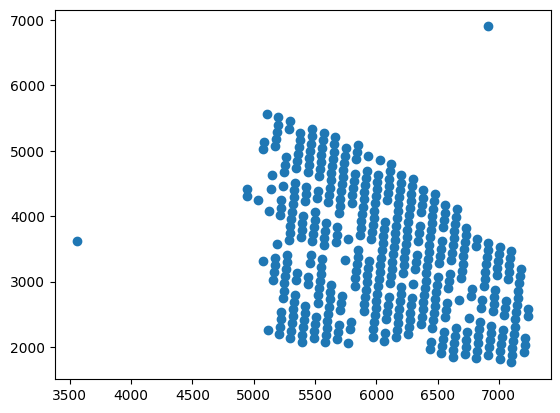

In [ ]:
plt.scatter(pos[0], pos[1])

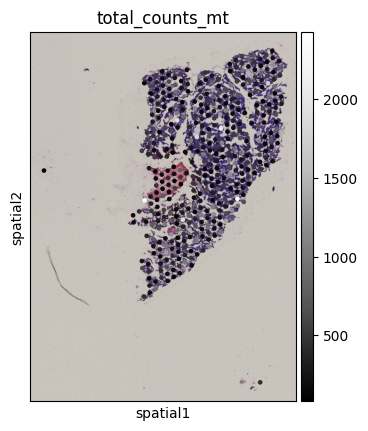

In [ ]:
sc.pl.spatial(adata, color="total_counts_mt", color_map="Greys_r")

In [ ]:
sc.tl.leiden(adata)

c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\pedro\OneDrive\Área de Trabalho\projeto_INCA\spatial_ovary\.venv\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


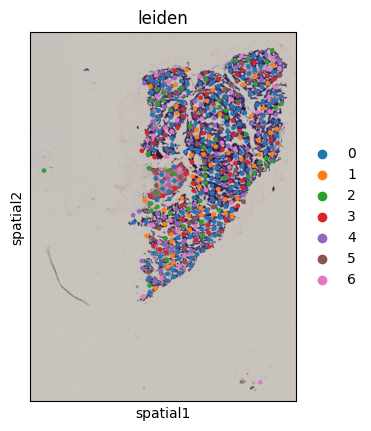

In [ ]:
sc.pl.spatial(adata, color="leiden")

In [14]:
def pp(adata):
    sc.pp.filter_cells(adata, min_counts=2000)
    sc.pp.filter_cells(adata, max_counts=50000)
    adata = adata[adata.obs["pct_counts_mt"] < 20]
    sc.pp.filter_genes(adata, min_cells=10)  
    sc.pp.normalize_total(adata, target_sum=10e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)  
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    return adata

## aplicado na amostra 1